<a href="https://colab.research.google.com/github/fmezacr/machinelearning/blob/main/Matriz_Confusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

<div style="font-size:small;">

MIT License

Copyright (c) [2024] Felipe Meza-Obando

*Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software for educational purposes only. You must give author appropriate credit, provide a link to the license and source, and indicate if changes were made.*
</div>

---

# **Tutorial: Evaluación de Modelos de Clasificación con Matriz de Confusión y Métricas Multiclase**
### Autor: ***Felipe Meza-Obando***


A continuación aprenderemos cómo evaluar el desempeño de un modelo de clasificación utilizando una de las herramientas más importantes en **Machine Learning**: la **matriz de confusión**. Junto con la matriz, también veremos cómo calcular y analizar métricas de evaluación esenciales como la **precisión**, **recall**, **F1-score** y **exactitud** (accuracy). Todas estas herramientas son clave para entender no solo cuántas predicciones fueron correctas, sino **dónde** y **por qué** el modelo comete errores.

Los objetivos de este tutorial son:

1. **Introducir la matriz de confusión** y su utilidad para analizar los errores y aciertos de un modelo en problemas de clasificación multiclase.
2. **Explicar las métricas de evaluación**, como precisión, recall, F1-score, y cómo se utilizan para evaluar el rendimiento del modelo.
3. **Visualizar gráficamente** los resultados del modelo mediante la matriz de confusión.
4. **Aplicar estas herramientas a un caso práctico**: usaremos el dataset de **Human Activity Recognition Using Smartphones** para predecir actividades humanas basándonos en datos recolectados por sensores de smartphones.

### **Estructura del Tutorial**:

1. **Exploración del dataset**:
   - Cargaremos el dataset de actividades humanas y revisaremos cómo está estructurado, qué características contiene y cuántas clases de actividades hay.
   
2. **Entrenamiento de un modelo de clasificación**:
   - Entrenaremos un modelo de **Random Forest** para clasificar las actividades humanas basadas en las características de los datos de sensores.
   
3. **Cálculo de la Matriz de Confusión**:
   - Generaremos la **matriz de confusión** para evaluar qué tan bien el modelo clasifica cada actividad y visualizaremos los errores mediante una representación gráfica.

4. **Cálculo de las Métricas de Clasificación**:
   - Calcularemos las métricas esenciales de precisión, recall y F1-score para cada clase y analizaremos cómo se comporta el modelo en cada una de las actividades.
   
5. **Conclusiones y mejoras**:
   - Analizaremos los resultados del modelo y discutiremos posibles estrategias para mejorar el rendimiento basado en las observaciones de la matriz de confusión y las métricas.

### **¿Por qué es importante este análisis?**
En muchos casos, evaluar un modelo de clasificación simplemente con el porcentaje de aciertos (**accuracy**) no es suficiente, especialmente cuando trabajamos con **clases desbalanceadas** o cuando ciertos errores tienen más peso que otros. La matriz de confusión y las métricas de evaluación nos permiten:

- **Entender a fondo** cómo se comporta el modelo con cada clase específica.
- **Identificar confusiones comunes**: saber qué clases tienden a ser confundidas entre sí.
- **Mejorar el modelo**: identificar patrones de error puede ayudarnos a ajustar el modelo, el preprocesamiento de datos o las técnicas de validación.

### **Pasos a seguir**:

1. **Carga del dataset**: Descargaremos y cargaremos los datos en nuestro entorno de trabajo.
2. **Entrenamiento del modelo**: Entrenaremos un clasificador multiclase con el modelo de **Random Forest**.
3. **Evaluación con la matriz de confusión**: Visualizaremos la matriz de confusión y explicaremos cómo interpretar los resultados.
4. **Cálculo de métricas**: Obtendremos y analizaremos las métricas como precisión, recall y F1-score.
5. **Análisis final**: Discutiremos los resultados obtenidos y cómo podríamos mejorar el rendimiento del modelo.



Usaremos el dataset **Human Activity Recognition Using Smartphones**. El objetivo del dataset es clasificar correctamente diferentes actividades humanas (como caminar, estar de pie, sentarse, etc.) basándose en datos obtenidos de los sensores de acelerómetros y giroscopios de smartphones. Las señales registradas mientras los sujetos realizan las actividades se procesan para generar un conjunto de 561 características derivadas, que se utilizan para entrenar modelos de Machine Learning y predecir qué actividad está realizando una persona en un momento dado.

### **Carga de los datos**

Primero, vamos a cargar el dataset y revisar su estructura básica:

In [1]:

import pandas as pd
from zipfile import ZipFile
import requests
from io import BytesIO

# Descargar y extraer el archivo zip desde la UCI Machine Learning Repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'
response = requests.get(url)
zip_file = ZipFile(BytesIO(response.content))

# Cargar los archivos de datos (X_train, y_train)
X_train = pd.read_csv(zip_file.open('UCI HAR Dataset/train/X_train.txt'), sep='\s+', header=None)
y_train = pd.read_csv(zip_file.open('UCI HAR Dataset/train/y_train.txt'), sep='\s+', header=None)

# Cargar las etiquetas de las actividades
activity_labels = pd.read_csv(zip_file.open('UCI HAR Dataset/activity_labels.txt'), sep='\s+', header=None)

# Ver las primeras filas de los datos
print(X_train.head())
print(y_train.head())


        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788   
4 -0.979672 -0.990441 -0.942469  ...  0.087753 -0.351471 -0.699205  0.123320   

        555       556       557       558       559       560  
0  0



### **Dimensiones del dataset**

Vamos a ver cuántas muestras y cuántas características tiene el dataset.



In [2]:
print(f"Dimensiones del conjunto de entrenamiento: {X_train.shape}")

Dimensiones del conjunto de entrenamiento: (7352, 561)


**Resultado**:
- **7,352 muestras** en el conjunto de entrenamiento.
- **561 características** (derivadas de los sensores de acelerómetro y giroscopio del smartphone).

### **Distribución de las etiquetas de actividad**

Para entender mejor cómo están distribuidas las diferentes clases de actividades, veamos un desglose del número de instancias por clase.

In [3]:

# Renombrar la columna de las etiquetas de actividad
y_train.columns = ['Activity']

# Mostrar el número de instancias por actividad
print(y_train['Activity'].value_counts())


Activity
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


**Resultado** (Ejemplo):
- La actividad **6 (Laying)** tiene más instancias.
- La actividad **3 (Walking Downstairs)** tiene menos ejemplos.



### **Descripción rápida de las características**

Aunque las 561 características están basadas en las señales de los sensores, podemos calcular algunas estadísticas rápidas sobre los datos:



In [4]:

# Ver estadísticas generales de las características
print(X_train.describe())




               0            1            2            3            4    \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean      0.274488    -0.017695    -0.109141    -0.605438    -0.510938   
std       0.070261     0.040811     0.056635     0.448734     0.502645   
min      -1.000000    -1.000000    -1.000000    -1.000000    -0.999873   
25%       0.262975    -0.024863    -0.120993    -0.992754    -0.978129   
50%       0.277193    -0.017219    -0.108676    -0.946196    -0.851897   
75%       0.288461    -0.010783    -0.097794    -0.242813    -0.034231   
max       1.000000     1.000000     1.000000     1.000000     0.916238   

               5            6            7            8            9    ...  \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000  ...   
mean     -0.604754    -0.630512    -0.526907    -0.606150    -0.468604  ...   
std       0.418687     0.424073     0.485942     0.414122     0.544547  ...   
min      -1.00000

Esto mostrará el **promedio**, **desviación estándar**, **mínimos** y **máximos** de las 561 características. Aunque no conoceremos el significado exacto de cada característica (son derivadas de las señales de los sensores), esta descripción rápida puede ayudar a identificar posibles anomalías en los datos.



### **¿Cuántas clases hay?**

Para confirmar cuántas actividades diferentes (clases) estamos tratando de predecir, podemos ver las etiquetas.



In [5]:

# Ver las etiquetas de actividad
print(f"Clases de actividad: {activity_labels[1].values}")

Clases de actividad: ['WALKING' 'WALKING_UPSTAIRS' 'WALKING_DOWNSTAIRS' 'SITTING' 'STANDING'
 'LAYING']



**Resultado**:
- Hay **6 clases** de actividad:
  - 1: Walking
  - 2: Walking Upstairs
  - 3: Walking Downstairs
  - 4: Sitting
  - 5: Standing
  - 6: Laying

### **Resumen del Dataset**:

- El dataset contiene **7,352 muestras** y **561 características** en el conjunto de entrenamiento.
- Las actividades se dividen en **6 clases**.
- Hay una distribución variada de las actividades, con algunas clases (como Laying) más representadas que otras (como Walking Downstairs).
- Las características derivadas de los sensores pueden ser revisadas con estadísticas básicas como la media y la desviación estándar, aunque no interpretamos cada característica de manera individual en este EDA resumido.



Tamaño del conjunto de entrenamiento: (7352, 561)
Tamaño del conjunto de prueba: (2947, 561)
Etiquetas de actividades:    0                   1
0  1             WALKING
1  2    WALKING_UPSTAIRS
2  3  WALKING_DOWNSTAIRS
3  4             SITTING
4  5            STANDING
5  6              LAYING
Primeras filas del conjunto de entrenamiento:
        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0

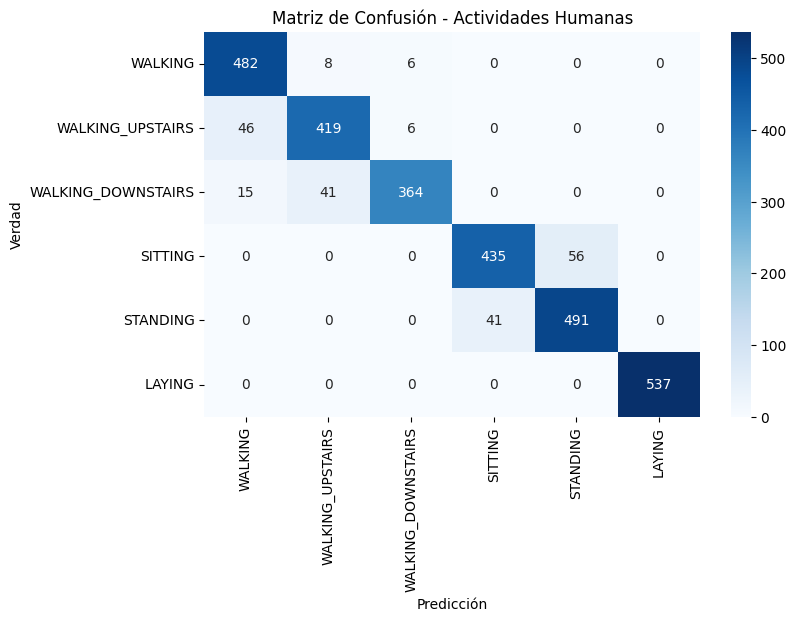

Reporte de Clasificación:
                    precision    recall  f1-score   support

           WALKING       0.89      0.97      0.93       496
  WALKING_UPSTAIRS       0.90      0.89      0.89       471
WALKING_DOWNSTAIRS       0.97      0.87      0.91       420
           SITTING       0.91      0.89      0.90       491
          STANDING       0.90      0.92      0.91       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947



In [6]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Descargar y extraer el archivo zip desde la UCI Machine Learning Repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'
response = requests.get(url)
zip_file = ZipFile(BytesIO(response.content))

# Cargar los archivos de datos (X_train, y_train, X_test, y_test) usando sep='\s+'
X_train = pd.read_csv(zip_file.open('UCI HAR Dataset/train/X_train.txt'), sep='\s+', header=None)
y_train = pd.read_csv(zip_file.open('UCI HAR Dataset/train/y_train.txt'), sep='\s+', header=None)
X_test = pd.read_csv(zip_file.open('UCI HAR Dataset/test/X_test.txt'), sep='\s+', header=None)
y_test = pd.read_csv(zip_file.open('UCI HAR Dataset/test/y_test.txt'), sep='\s+', header=None)

# En el contexto de pandas.read_csv(), la opción sep='\s+' especifica que el separador (o delimitador)
# entre los valores en el archivo que se está leyendo es uno o más espacios en blanco.

# Cargar las etiquetas de las actividades
activity_labels = pd.read_csv(zip_file.open('UCI HAR Dataset/activity_labels.txt'), sep='\s+', header=None)

# Renombrar las columnas del conjunto de entrenamiento y prueba para mayor claridad
y_train.columns = ['Activity']
y_test.columns = ['Activity']

# Mostrar información básica del dataset
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
print(f"Etiquetas de actividades: {activity_labels}")

# Mostrar las primeras filas del conjunto de entrenamiento
print("Primeras filas del conjunto de entrenamiento:")
print(X_train.head())
print(y_train.head())

# Entrenar el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train.values.ravel())

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.4f}")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=activity_labels[1].values, yticklabels=activity_labels[1].values)
plt.title('Matriz de Confusión - Actividades Humanas')
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.show()

# Mostrar el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=activity_labels[1].values))




### **Análisis de la Matriz de Confusión**:

Cada celda en la matriz de confusión nos indica cuántas veces se predijo una actividad y cuántas veces esa predicción fue correcta o incorrecta. Aquí están las clases (actividades) en las etiquetas del eje X y del eje Y:

- **Verdad**: Es la actividad real realizada (eje Y).
- **Predicción**: Es la actividad que predijo el modelo (eje X).

#### **Diagonales principales**:
Los valores en la diagonal (de arriba a la izquierda hacia abajo a la derecha) son los **aciertos**, es decir, cuando el modelo predijo correctamente la actividad que realmente ocurrió.

#### **Interpretación de cada fila**:
- **WALKING**:
  - El modelo predijo correctamente **482** casos como "WALKING" (correcto).
  - Hubo **8** casos que en realidad eran "WALKING", pero el modelo los predijo como "WALKING_UPSTAIRS".
  - Hubo **6** casos que en realidad eran "WALKING", pero el modelo los predijo como "WALKING_DOWNSTAIRS".
  
- **WALKING_UPSTAIRS**:
  - Hubo **419** predicciones correctas para esta clase.
  - Sin embargo, **46** veces la actividad era realmente "WALKING_UPSTAIRS", pero el modelo predijo "WALKING".
  - **6** veces predijo "WALKING_DOWNSTAIRS" cuando la actividad era "WALKING_UPSTAIRS".

- **WALKING_DOWNSTAIRS**:
  - Predicciones correctas: **364** veces.
  - Hubo **41** casos en los que predijo "WALKING_UPSTAIRS" en lugar de "WALKING_DOWNSTAIRS".
  - Hubo **15** casos en los que predijo "WALKING" en lugar de "WALKING_DOWNSTAIRS".

- **SITTING**:
  - Predicciones correctas: **435** veces.
  - Sin embargo, hubo **56** casos donde la actividad real era "SITTING", pero el modelo predijo "STANDING".

- **STANDING**:
  - Predicciones correctas: **491** veces.
  - El modelo cometió **41** errores al predecir "STANDING" cuando la actividad real era "SITTING".

- **LAYING**:
  - Predicciones correctas: **537** veces. No hubo errores en esta clase.

### **Análisis de los Errores Comunes**:

1. **Errores entre actividades de movimiento similares**:
   - El modelo tiende a confundir **WALKING**, **WALKING_UPSTAIRS**, y **WALKING_DOWNSTAIRS**. Esto es comprensible, ya que estas actividades son similares en términos de las señales de acelerómetros y giroscopios, lo que puede dificultar la distinción.

2. **Errores entre SITTING y STANDING**:
   - El modelo confundió **56 veces** la actividad "SITTING" con "STANDING" y **41 veces** la actividad "STANDING" con "SITTING". Esto puede suceder porque las señales de estas dos actividades pueden ser muy similares en ciertos momentos, especialmente si la persona cambia de posición lentamente o de manera estática.

3. **LAYING**:
   - El modelo identificó perfectamente todos los casos de la clase **LAYING**. Esto sugiere que las señales de esta actividad son suficientemente distintas como para que el modelo las reconozca fácilmente.

### **Conclusión**:
- El modelo se desempeña muy bien en actividades más diferenciadas como **LAYING** y tiene un buen desempeño en **WALKING**.
- Las actividades de movimiento similares, como las diferentes formas de caminar, presentan más confusión.
- Hay una tendencia a confundir las actividades estáticas de **SITTING** y **STANDING**, lo que podría mejorarse utilizando técnicas avanzadas o más datos.



### **Interpretación de las Métricas**:

El reporte de clasificación nos proporciona cuatro métricas importantes para cada clase: **precision**, **recall**, **f1-score** y **support**. También tenemos la **exactitud** (accuracy) general del modelo. A continuación, te explico cada una de estas métricas y cómo interpretar los resultados que has obtenido:

#### **1. Precision (Precisión)**:
- **Definición**: La precisión es la proporción de predicciones correctas entre todas las instancias que el modelo predijo como pertenecientes a una clase. En otras palabras, mide cuántas de las predicciones positivas del modelo fueron correctas.
  
  - Fórmula:  
    $$
    \text{Precisión} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Positivos}}
    $$

- **Interpretación**:
  - Para **WALKING**, la precisión es **0.89**, lo que significa que el **89%** de las veces que el modelo predijo "WALKING", la predicción fue correcta.
  - **LAYING** tiene una precisión perfecta de **1.00**, es decir, **todas** las veces que predijo "LAYING", acertó.
  - En general, el modelo tiene buena precisión para todas las actividades, con valores por encima de **0.89**.

#### **2. Recall (Sensibilidad)**:
- **Definición**: El recall mide la capacidad del modelo para identificar correctamente todas las instancias reales de una clase. Es la proporción de instancias correctamente clasificadas entre todas las instancias que pertenecen a una clase.

  - Fórmula:  
    $$
    \text{Recall} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Negativos}}
    $$

- **Interpretación**:
  - **WALKING** tiene un recall de **0.97**, lo que significa que el modelo identificó correctamente el **97%** de las veces en las que realmente había actividad "WALKING".
  - **LAYING** también tiene un recall perfecto de **1.00**, es decir, **todas** las instancias de "LAYING" fueron correctamente identificadas.
  - Las actividades como **WALKING_UPSTAIRS** tienen un recall un poco más bajo (**0.89**), lo que significa que el modelo no identificó correctamente el **11%** de las veces en que esta actividad estaba presente.

#### **3. F1-Score**:
- **Definición**: El **F1-score** es la media armónica entre la precisión y el recall. Es útil cuando hay un equilibrio entre la precisión y el recall, ya que resume ambos en un solo valor.

  - Fórmula:  
    $$
    \text{F1-Score} = 2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}}
    $$

- **Interpretación**:
  - **WALKING** tiene un F1-score de **0.93**, lo que significa que el modelo tiene un buen balance entre precisión y recall para esta actividad.
  - **LAYING** tiene un F1-score perfecto de **1.00**, lo que significa que la predicción de esta clase fue impecable en términos de precisión y recall.
  - **WALKING_UPSTAIRS** tiene el F1-score más bajo (**0.89**), lo que refleja que hay un ligero desequilibrio entre la precisión y el recall en esta actividad.

#### **4. Support**:
- **Definición**: El **support** indica el número total de instancias reales de cada clase en el conjunto de prueba. No es una métrica de desempeño, pero es útil para entender cuántos ejemplos había de cada clase.

- **Interpretación**:
  - **WALKING** tiene **496** instancias en el conjunto de prueba.
  - **WALKING_UPSTAIRS** tiene **471** instancias, etc.
  - El support te ayuda a ver si algunas clases están representadas de manera más abundante que otras.

#### **5. Exactitud (Accuracy)**:
- **Definición**: La **exactitud** es la proporción de predicciones correctas entre todas las predicciones realizadas. Es una métrica general que refleja el rendimiento global del modelo.

  - Fórmula:

$$\text{Accuracy} = \frac{\text{Predicciones Correctas}}{\text{Total de Predicciones}}$$

- **Interpretación**:
  - La exactitud global del modelo es **0.93**. Esto significa que el **93%** de las predicciones realizadas fueron correctas.

#### **6. Macro Average (Promedio Macro)**:
- **Definición**: El **macro average** calcula el promedio de precisión, recall y F1-score para todas las clases, tratándolas a todas por igual (sin tener en cuenta el support).
  
- **Interpretación**:
  - El **macro average** es **0.93** para precisión, recall y F1-score, lo que indica que en promedio, el modelo se desempeña muy bien en todas las clases, sin darle más importancia a las clases más comunes.

#### **7. Weighted Average (Promedio Ponderado)**:
- **Definición**: El **weighted average** calcula el promedio de precisión, recall y F1-score, ponderado por el número de instancias en cada clase (support). Así, las clases con más ejemplos tendrán más influencia en el promedio.

- **Interpretación**:
  - El **weighted average** es también **0.93** en todas las métricas, lo que refleja que las clases con más instancias (como WALKING o STANDING) no están afectando de manera negativa el desempeño global del modelo.

### **Conclusión General**:
- **LAYING** es la actividad que el modelo predice perfectamente, con una precisión, recall y F1-score de **1.00**.
- **WALKING** también tiene muy buen desempeño, con un F1-score de **0.93** y un recall de **0.97**.
- **WALKING_UPSTAIRS** es la actividad que presenta más dificultades para el modelo, con un F1-score de **0.89**, lo que refleja que el modelo confunde esta actividad con otras similares (como se vio en la matriz de confusión).



**Final Bonus Tip** 💡

La matriz de confusión recibe su nombre porque muestra cuántas veces el modelo está "confundido" al realizar predicciones. Es decir, nos permite ver cuántas veces el modelo predice incorrectamente una clase como si fuera otra, mostrando dónde ocurren los errores.